## Explore dataset

In [1]:
# Importazione delle Librerie
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import os
DATASET = "../data/raw/cmems_obs-sl_eur_phy-ssh_my_allsat-l4-duacs-0.0625deg_P1D.nc"

In [2]:
dataset = xr.load_dataset(DATASET)
dataset

<xarray.Dataset> Size: 11GB
Dimensions:    (time: 11487, latitude: 120, longitude: 321)
Coordinates:
  * latitude   (latitude) float32 480B 22.03 22.09 22.16 ... 29.34 29.41 29.47
  * longitude  (longitude) float32 1kB -30.03 -29.97 -29.91 ... -10.09 -10.03
  * time       (time) datetime64[ns] 92kB 1993-01-01 1993-01-02 ... 2024-06-13
Data variables:
    sla        (time, latitude, longitude) float64 4GB 0.0088 0.0094 ... nan
    ugos       (time, latitude, longitude) float64 4GB -0.0004 -0.0023 ... nan
    vgos       (time, latitude, longitude) float64 4GB 0.0188 -0.004 ... nan
Attributes:
    institution:               CLS, CNES
    source:                    Altimetry measurements
    title:                     DT merged all satellites European Seas Gridded...
    references:                http://marine.copernicus.eu
    Conventions:               CF-1.6
    comment:                   Sea Surface Height measured by Altimetry and d...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    history:                   2024-10-24 07:06:58Z: Creation
    copernicusmarine_version:  2.0.1

In [3]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt


# 1. Number of samples in time
num_samples = dataset.sizes['time']

# 2. Convert the time coordinate to a pandas datetime index
time_index = pd.to_datetime(dataset['time'].values)

# Create a DataFrame to analyze the time distribution
time_df = pd.DataFrame({'time': time_index})
time_df.set_index('time', inplace=True)

# Resample by day to count the number of samples per day
daily_counts = time_df.resample('D').size()


print(f"Total time samples: {num_samples}")
print(f"Average samples per day: { daily_counts.mean()}")
print(f"Total days: {len(dataset.time)}")
print(f"Date range: {dataset.time[0].values} to {dataset.time[-1].values}")

Total time samples: 11487
Average samples per day: 1.0
Total days: 11487
Date range: 1993-01-01T00:00:00.000000000 to 2024-06-13T00:00:00.000000000


### Plot the distribution of samples in time

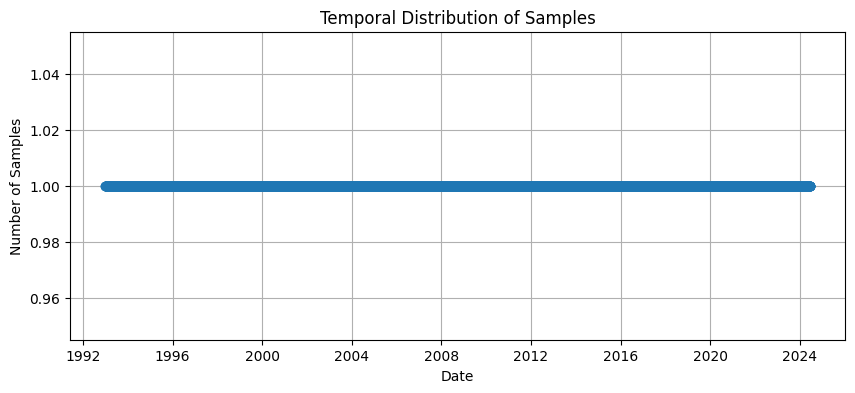

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Samples')
plt.title('Temporal Distribution of Samples')
plt.grid(True)
plt.show()

### Plot SLA - Day 0

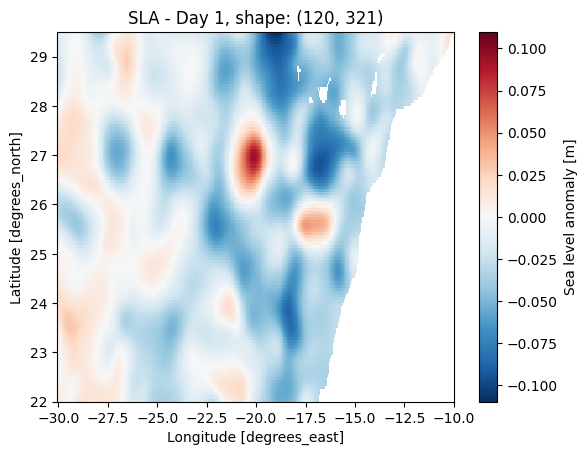

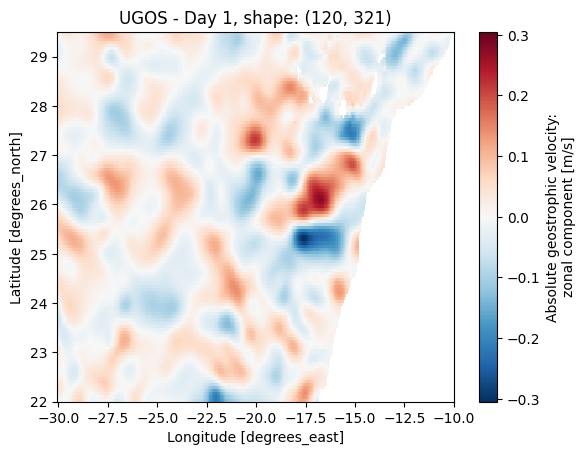

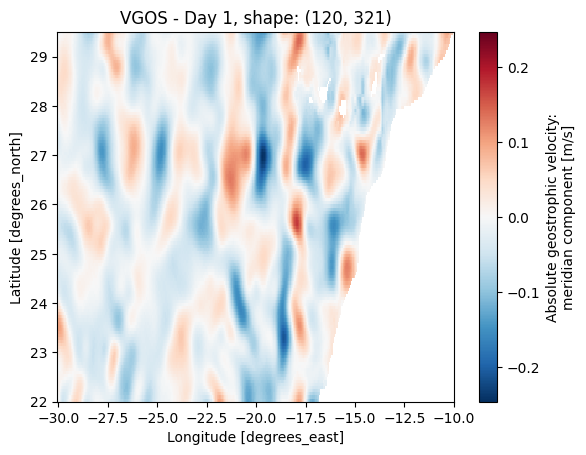

In [5]:
# Spatial plot example

datapoint = dataset.isel(time=0)  # Select the first time point
datapoint.sla.plot(x="longitude", y="latitude", robust=False)
plt.title("SLA - Day 1, shape: {}".format(dataset.isel(time=0).sla.shape))
plt.show()

datapoint.ugos.plot(x="longitude", y="latitude", robust=False)
plt.title("UGOS - Day 1, shape: {}".format(dataset.isel(time=0).ugos.shape))
plt.show()
datapoint.vgos.plot(x="longitude", y="latitude", robust=False)
plt.title("VGOS - Day 1, shape: {}".format(dataset.isel(time=0).vgos.shape))
plt.show()


## Plot with projection

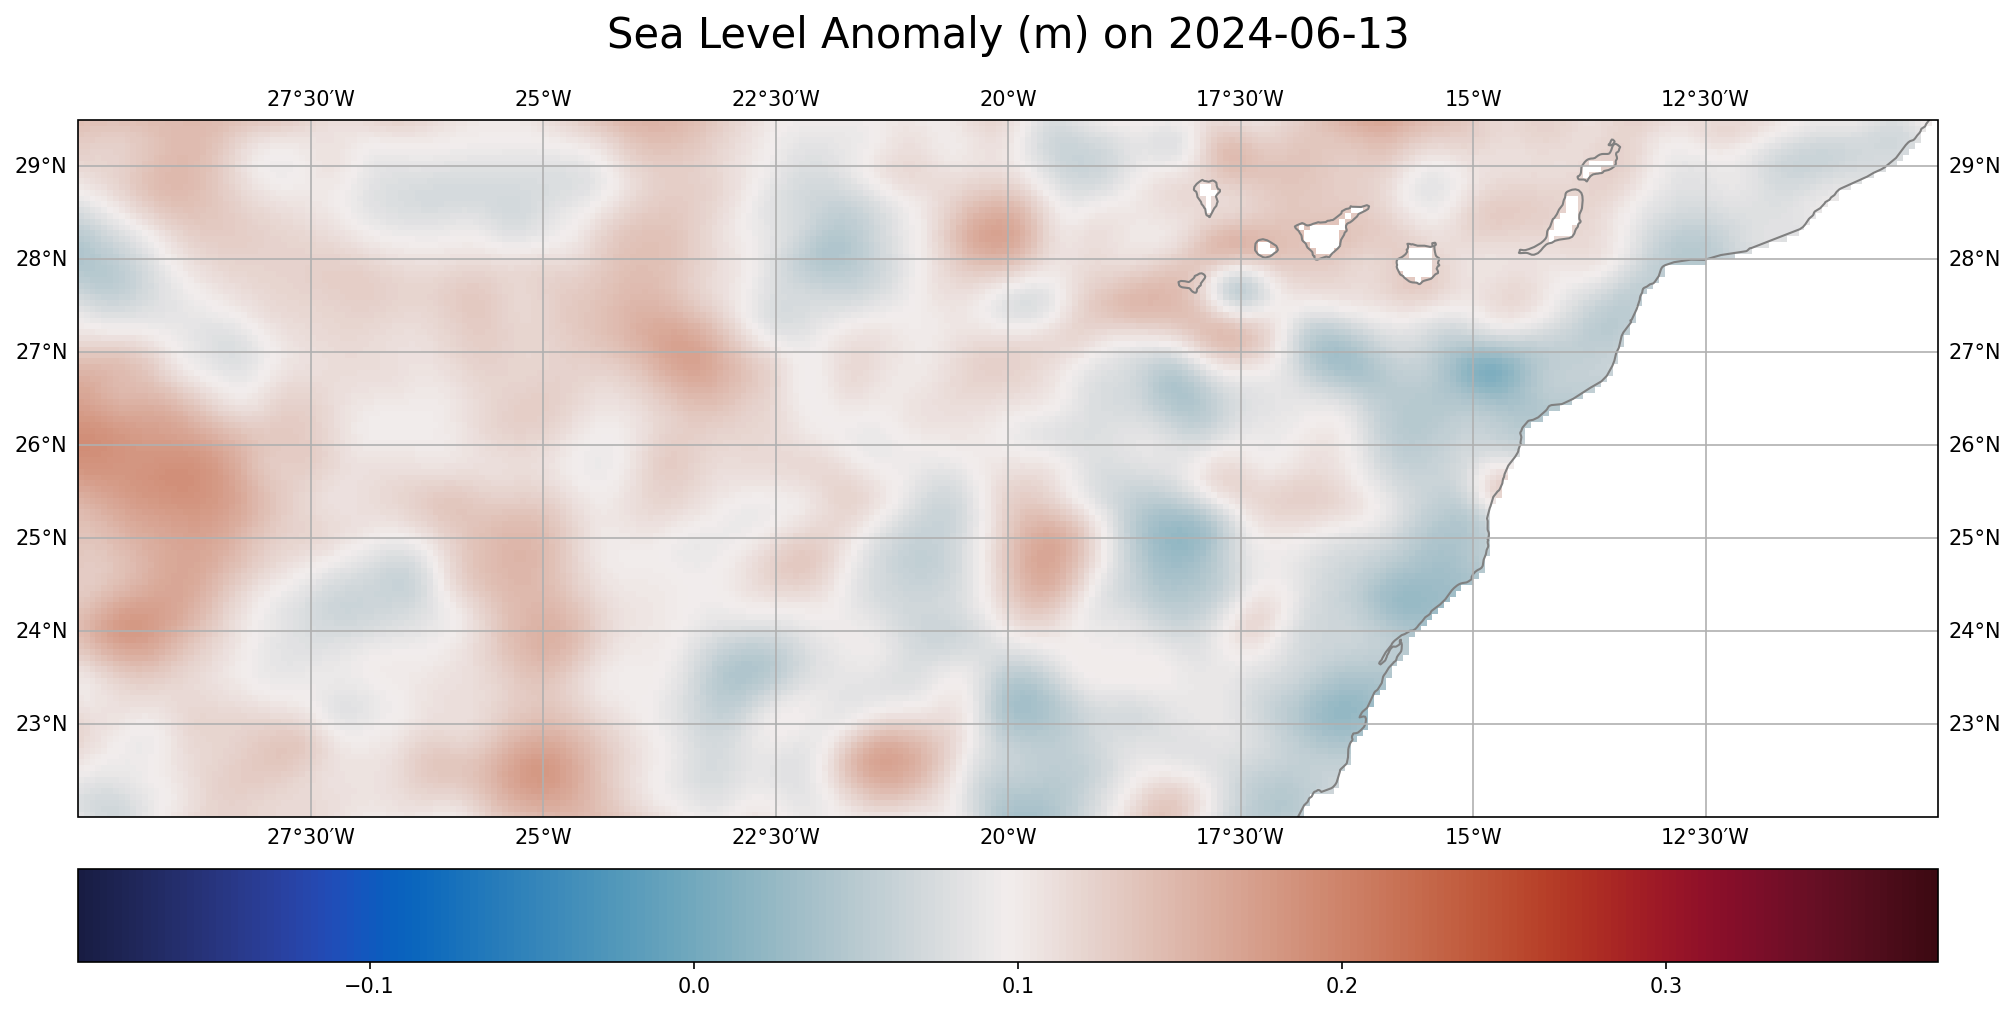

In [6]:
import cmocean
import cartopy.crs as ccrs

SLA = dataset.sla

vmin = float(SLA.min())
vmax = float(SLA.max())
SLA = dataset.sla.isel(time=11486)
readable_date = np.datetime_as_string(SLA.time.values, unit='D')
fig = plt.figure(figsize=(16, 9), dpi=150)
ax  = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-30, -10, 22, 29.5], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(SLA.longitude, SLA.latitude, SLA, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance)
ax.coastlines(resolution='10m', color='gray', linewidth=1)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.title(f"Sea Level Anomaly (m) on {readable_date}", fontsize=20, pad=20)
cbar = fig.colorbar(mesh, ax=ax, orientation='horizontal', pad=0.05)
plt.show()
plt.close(fig)